# Integração numérica

Pare encontrarmos a solução no tempo da equação $ m\ddot{x}(t) + c\dot{x}(t) + kx(t) = f(t)$ iremos utilizar a função odeint do scipy.

Vendo o help da função odeint (scipy.integrate.odeint?):
```
scipy.integrate.odeint(func, y0, t,...)

Parameters:	
func : callable(y, t0, ...)

Computes the derivative of y at t0.

y0 : array

Initial condition on y (can be a vector).

t : array

A sequence of time points for which to solve for y. The initial value point should be the first element of this sequence.
```

Observando o help também notamos:
> Solves the initial value problem for stiff or non-stiff systems of _**first order**_ ode-s:

Para transformamos a equação de segunda ordem em um sistema de primeira ordem utilizamos as variáveis $x_1 = x(t)$ e $x_2 = \dot{x}(t)$.

\begin{equation}
m\ddot{x}(t) + c\dot{x}(t) + kx(t) = f(t)\\
\downarrow\\
\dot{x}_1(t) = x_2(t)\\
\dot{x}_2(t) = \frac{f(t)}{m} -\frac{c}{m}\ x_2(t) - \frac{k}{m}\ x_1(t)
\end{equation}

Esse sistema pode ser descrito com matrizes:
\begin{equation}
{\bf A} = 
\left[ \matrix{
0 & 1 \\
-\frac{k}{m} & -\frac{c}{m}  \\
} \right] \ \ \ \ \ 
{\bf x}(t) = 
\left[ \matrix{
x_1(t) \\
x_2(t) \\
} \right] \\
\\
\
\\
\dot{\bf x}(t) = A{\bf x}(t)
\end{equation}

In [1]:
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

### Escrever a função que calcula a derivada de x em t:

In [2]:
def func(x, t):
  
    m=100
    c=200
    k=2000
    w = 10
    F0 = 150
    
    # definir x1 e x2:
    [x1,x2] = x
    
    # calcular dxdt utilizando a função cos como forçamento (F0*sp.cos)
    dxdt = [x2, F0*sp.cos(w*t)/m - c*x2/m-k*x1/m]
    
    return dxdt

### Determinar condições iniciais e o intervalo de tempo:

In [3]:
# Condições iniciais
x0=0.01
v0=0.1

#Criar array com condições iniciais
z0 = [x0, v0]

# Criar array com o tempo
tf = 6
t = sp.linspace(0, tf, 1000)

### Calcular a solução

In [7]:
sol = odeint(func, z0, t)

### Plotar solução deslocamento x tempo:

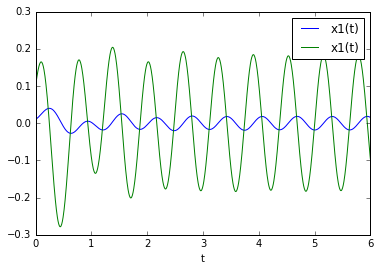

In [17]:
plt.plot(t, sol, label='x1(t)')
plt.legend()
plt.xlabel('t')

### Plotar solução velocidade x tempo:

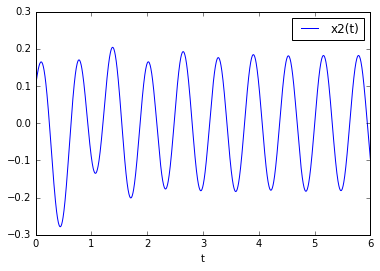

In [39]:
plt.plot(???, label='x2(t)')
plt.legend()
plt.xlabel('t')

In [9]:
solo

NameError: name 'solo' is not defined

In [10]:
sol

array([[ 0.01      ,  0.1       ],
       [ 0.01062028,  0.10652496],
       [ 0.01127921,  0.11286333],
       ..., 
       [ 0.01657811, -0.07679824],
       [ 0.01608737, -0.08657047],
       [ 0.01553885, -0.09603106]])

In [11]:
sol[0]

array([ 0.01,  0.1 ])

In [12]:
sol[:,0]

array([  1.00000000e-02,   1.06202792e-02,   1.12792050e-02,
         1.19755524e-02,   1.27078920e-02,   1.34745949e-02,
         1.42738389e-02,   1.51036149e-02,   1.59617344e-02,
         1.68458379e-02,   1.77534034e-02,   1.86817558e-02,
         1.96280775e-02,   2.05894181e-02,   2.15627066e-02,
         2.25447612e-02,   2.35323033e-02,   2.45219700e-02,
         2.55103251e-02,   2.64938729e-02,   2.74690721e-02,
         2.84323486e-02,   2.93801097e-02,   3.03087576e-02,
         3.12147034e-02,   3.20943806e-02,   3.29442595e-02,
         3.37608602e-02,   3.45407664e-02,   3.52806392e-02,
         3.59772292e-02,   3.66273902e-02,   3.72280909e-02,
         3.77764278e-02,   3.82696359e-02,   3.87051005e-02,
         3.90803674e-02,   3.93931533e-02,   3.96413547e-02,
         3.98230576e-02,   3.99365447e-02,   3.99803036e-02,
         3.99530332e-02,   3.98536495e-02,   3.96812914e-02,
         3.94353246e-02,   3.91153454e-02,   3.87211837e-02,
         3.82529046e-02,